In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
DS_all = tf.keras.preprocessing.image_dataset_from_directory('./dataset/',validation_split=0.2,subset='training',seed=42,batch_size=1000)
DS = tf.keras.preprocessing.image_dataset_from_directory('./dataset/',validation_split=0.2,subset='training',seed=42,batch_size=32)

val_DS = tf.keras.preprocessing.image_dataset_from_directory('./dataset/',validation_split=0.2,subset='validation',seed=42)

In [4]:
train_ds=DS

Plotting the dataset with labels. Dogs are 1's and Cats are 0's

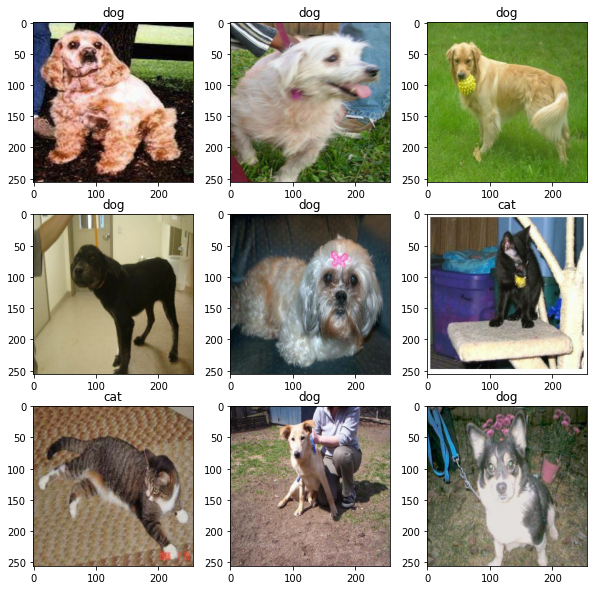

In [5]:
for p in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(p[0][i]).astype(int))
        plt.title(train_ds.class_names[int(p[1][i])])
#         plt.axis("off")

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1)
    ]
)


In [7]:
base_model = keras.applications.vgg16.VGG16(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(256, 256, 3),
    include_top=False,
) 
base_model.trainable = False

inputs = keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

norm_layer = keras.layers.experimental.preprocessing.Normalization()
mean = np.array([127.5] * 3)
var = mean ** 2
# Scale inputs to [-1, +1]
x = norm_layer(x)
norm_layer.set_weights([mean, var])

x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1)(x)
tmodel = keras.Model(inputs, outputs)

tmodel.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
normalization (Normalization (None, 256, 256, 3)       7         
_________________________________________________________________
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                

In [8]:
tmodel.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

# put to 20
epochs = 20
tmodel.fit(train_ds, epochs=epochs)

Epoch 1/20
1/1 [==============================] - 0s 2ms/step - loss: 0.8644 - binary_accuracy: 0.5123
Epoch 2/20
1/1 [==============================] - 0s 801us/step - loss: 0.8512 - binary_accuracy: 0.5123
Epoch 3/20
1/1 [==============================] - 0s 777us/step - loss: 0.8321 - binary_accuracy: 0.5123
Epoch 4/20
1/1 [==============================] - 0s 986us/step - loss: 0.8381 - binary_accuracy: 0.5123
Epoch 5/20
1/1 [==============================] - 0s 648us/step - loss: 0.7966 - binary_accuracy: 0.5123
Epoch 6/20
1/1 [==============================] - 0s 805us/step - loss: 0.7888 - binary_accuracy: 0.5123
Epoch 7/20
1/1 [==============================] - 0s 940us/step - loss: 0.7603 - binary_accuracy: 0.5185
Epoch 8/20
1/1 [==============================] - 0s 1ms/step - loss: 0.7462 - binary_accuracy: 0.5123
Epoch 9/20
1/1 [==============================] - 0s 873us/step - loss: 0.7408 - binary_accuracy: 0.4938
Epoch 10/20
1/1 [==============================] - 0s 904us

In [ ]:
base_model.trainable = True
tmodel.summary()

tmodel.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

#put to 10
epochs = 10
tmodel.fit(DS, epochs=epochs)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
normalization (Normalization (None, 256, 256, 3)       7         
_________________________________________________________________
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                

In [ ]:
tmodel.evaluate(train_ds)

In [ ]:
tmodel.evaluate(val_DS)

In [ ]:
tmodel.save("../dog-cat-model2")

In [8]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [9]:
inputs = keras.Input(shape=(256, 256, 3))

x=base_model(inputs,training=False)

new_model = keras.layers.GlobalMaxPooling2D()(x)
new_model = keras.layers.Activation(keras.activations.softmax)(new_model)
model = keras.Model(inputs, x)
modelChoice = keras.Model(inputs, new_model)

In [13]:
modelChoice.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
global_max_pooling2d (Global (None, 512)               0         
_________________________________________________________________
activation (Activation)      (None, 512)               0         
Total params: 14,714,688
Trainable params: 0
Non-trainable params: 14,714,688
_________________________________________________________________


In [14]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
Total params: 14,714,688
Trainable params: 0
Non-trainable params: 14,714,688
_________________________________________________________________


In [18]:
res = modelChoice.predict(train_ds)

In [19]:
d= list(train_ds.take(1).as_numpy_iterator())

In [20]:
dt = d[0][0]
yt = d[0][1]

In [21]:
rest = modelChoice.predict(dt)

In [22]:
rest.shape,dt.shape,yt.shape

((162, 512), (162, 256, 256, 3), (162,))

In [23]:
corr = []
for v in range(512):
#     print(v,np.corrcoef(yt,rest[:,v])[0,1])
    corr.append(np.corrcoef(yt,rest[:,v])[0,1])
# corr = [c if c != np.NAN else 0 for c in corr ]
corr=np.nan_to_num(np.array(corr))

In [24]:
res.shape

(162, 512)

In [25]:
import numpy as np

In [26]:
senset = np.sum(res,axis=0) # Sum over samples
senset = senset/np.sum(senset) # devide to normalize and reach same range as layer output

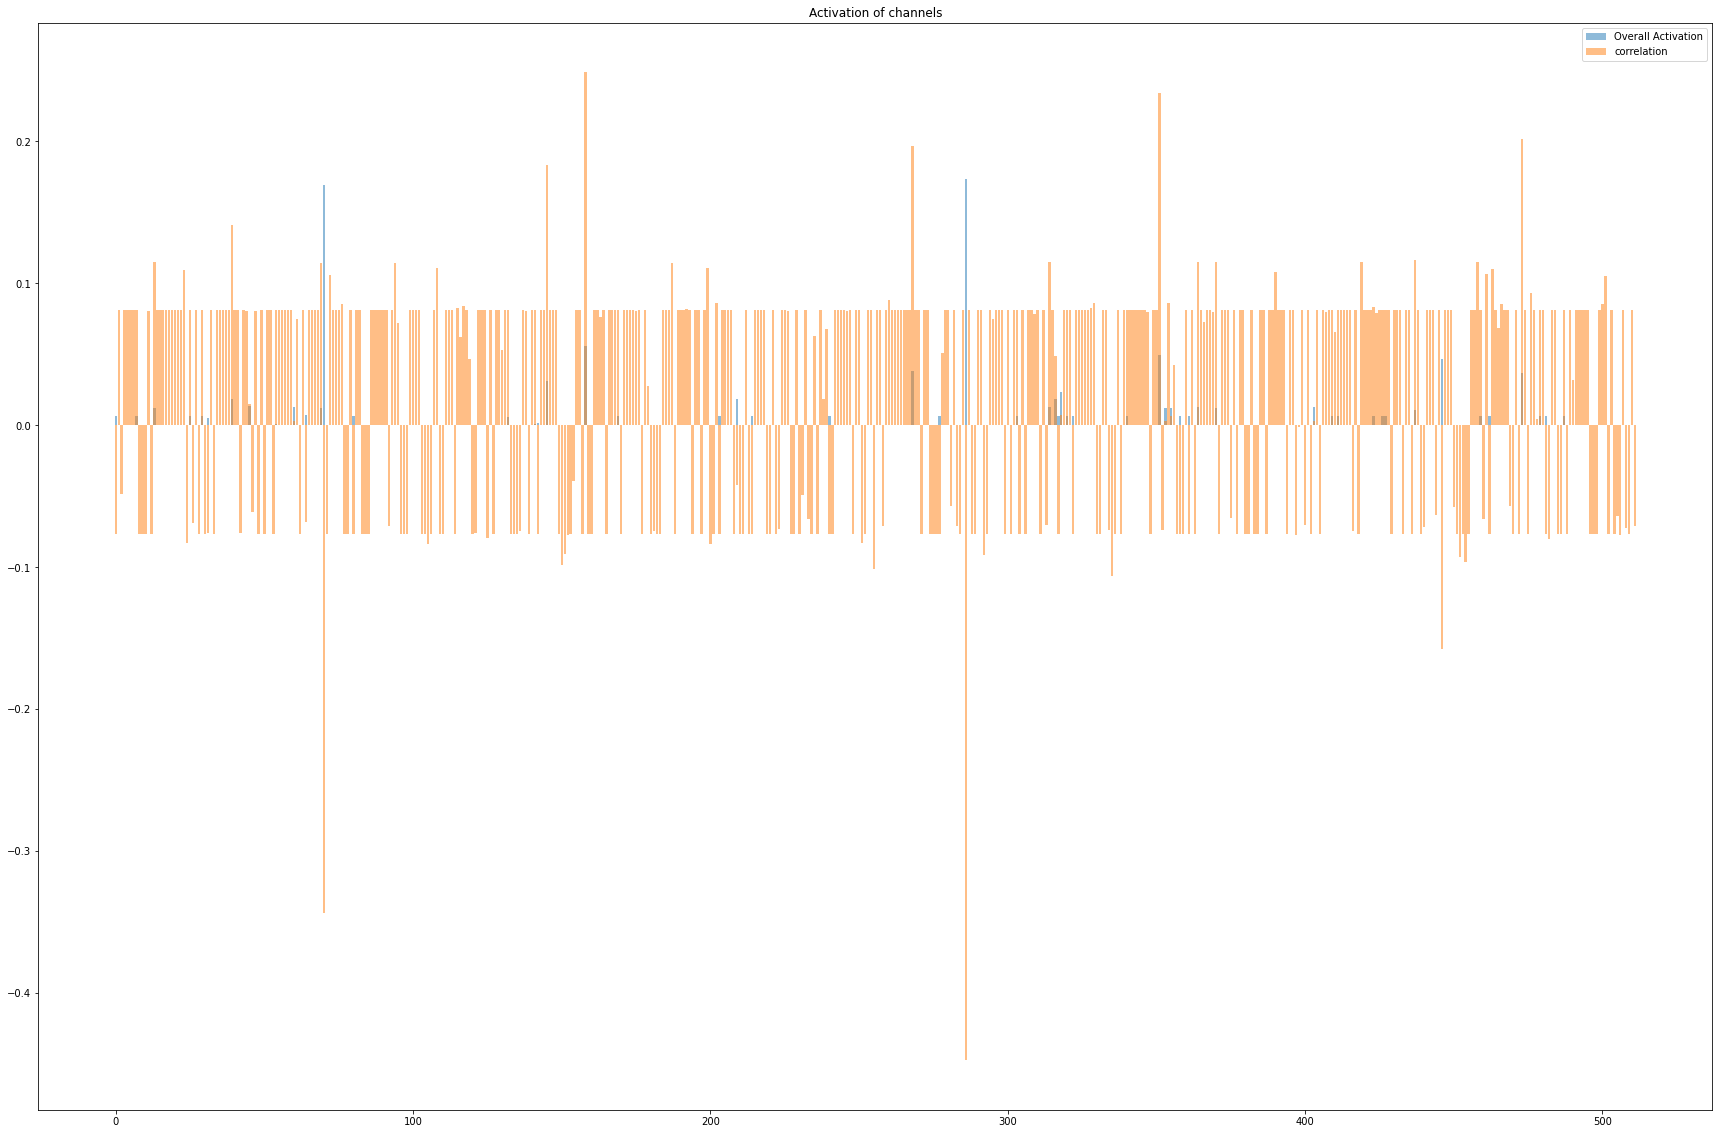

In [27]:
plt.figure(figsize=(30,20))
plt.bar(list(range(len(senset))),senset, label ="Overall Activation",alpha=0.5)
plt.bar(list(range(512)),corr,label="correlation",alpha=0.5)
plt.title("Activation of channels")
plt.legend()

As can be seen there are definetly some spikes in the activations which would be interesting to investigate. A lot if the activation sum and correlation spikes appear to line up. Therefore it would be resonable ot say there are neurons that are specifically activated by the cats and dogs in the images.

In [28]:
interestC = np.abs(corr).argsort()[-10:] # most correlated neurons
interestA = senset.argsort()[-10:] # interest based on activation only

Intersting neurons for **A**ctivation based selection and **C**orrelation based

In [38]:
interestA,interestC

(array([316, 318, 145, 473, 268, 446, 351, 158,  70, 286]),
 array([437,  39, 446, 145, 268, 473, 351, 158,  70, 286]))

Below the Correlations sorted by magnitude.

In [1]:
for i in reversed(interestC):
    print("Correlation Neuron:","%03d"%i,'\tValue:',round(corr[i],3))

NameError: name 'interestC' is not defined

 As Dogs are 1's and Cats are 0's, one can say that all negative correlation neurons e.g. 286 and 70 are predictors for Cats and positive ones for Dogs e.g. 158 and 351. However there is no reason to assume that activation is the 'predictor' so it coud very well be, that a lack of it may indicate presence of something. However, they definetly seem to be responding in a way to the object displayed.


# Plot neurons activation
In this section the acitivty from the chosen neurongs above are plotted

In [34]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import cv2

In order to show nicely how the activations and images correlate, the activations are plotted abovethe images themselves. The method below generatesthe images from the training set and plot them above the image as well as the activatio sum next to it. On demand, the individual outputs can also be plotted.

In [35]:
images = list(train_ds.take(1).as_numpy_iterator()) # get images form dataset
def plotInterest(interest,imagenum,plot_neurons = False):
    cmap=cm.get_cmap('viridis')   # use color map
    normalizer=Normalize(0,300)   #Normalizer, 300 seems to be the max activation given
    acts = np.zeros((8,8))   # area sum
    im=cm.ScalarMappable(norm=normalizer)
#     print(images[0][1])
    t = np.expand_dims(images[0][0][imagenum].astype(int), axis=0)
    res = model.predict(t)
    if plot_neurons:
        fig, axes = plt.subplots(nrows=2, ncols=5)
    for i in range(len(interest)):
        img=res[0,:,:,interest[i]]
        acts = acts+img
        if plot_neurons:
            axes.flat[i].imshow(img,cmap=cmap,norm=normalizer)
            axes.flat[i].set_title("N %d"%interest[i])
    #     plt.colorbar()
    if plot_neurons:
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax=cbar_ax)
        plt.show()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    cmap=cm.get_cmap('viridis')
    normalizer=Normalize(0,300)
    a=axes[0]
    a.imshow(t[0],alpha=1)
    a.imshow(cv2.resize(acts,dsize=(256,256)),alpha=0.5)
    axes[1].imshow(acts,alpha=0.5)
    plt.show()
    # a.imshow([1,2,30],[2,3,40])
    # a.imshow(img,cmap=cmap,norm=normalizer,alpha=0.25)

## Plotting of Activation based on Correlation

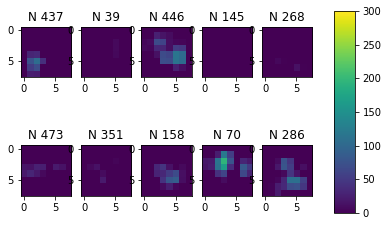

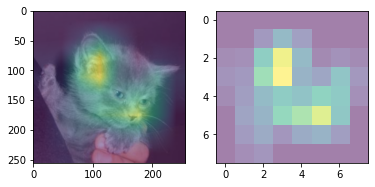

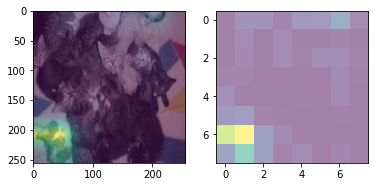

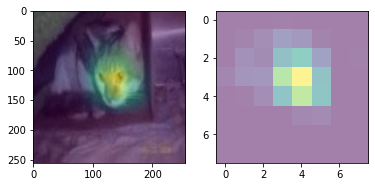

In [36]:
plotInterest(interestC,1,plot_neurons=True)
plotInterest(interestC,2)
plotInterest(interestC,3)

As can be seen, the nodes appear to locate the faces of the cats. The nodes overall appear to be good locators of the object.

## Plotting of Activation based on Activation overall

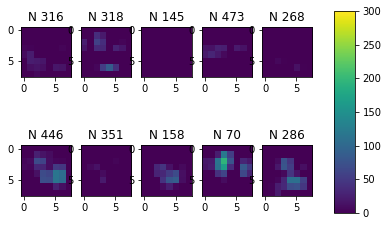

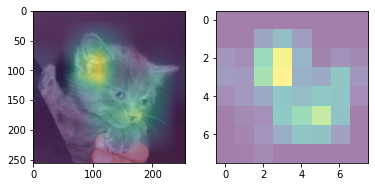

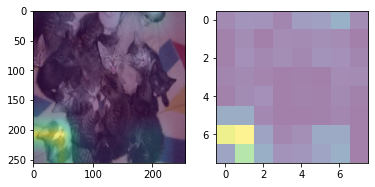

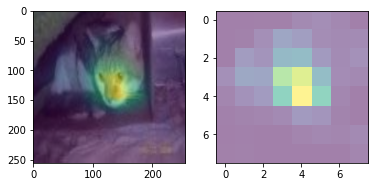

In [37]:
plotInterest(interestA,1,plot_neurons=True)
plotInterest(interestA,2)
plotInterest(interestA,3)

The activation also creates a clear highlight of the face, which is also likely given that a lot of neurons are shared. It appears though, that the correltation based neurons are a bit more consize and the noise appears to be better distributed around the object of interest. Overal both choices appear be valid for locating objects in the image.

# Conclusion

As can be seen, the neurons activation seems to consistently locate the head and/or the legs of the cat/dog. Although it is difficul to say how well this will work on images where the objects are smaller, it appears to be a good locator of the objects that are being classified.